In [185]:
import os
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS

plt.style.use('default')
plt.style.use('dark_background')

pd.set_option('display.max_columns', None)

In [186]:
posts = pd.read_csv('halloween_2019.csv')

posts.shape

(82639, 51)

In [187]:
posts

,input.hashtag,input.max_id,data.hashtag.edge_hashtag_to_media.edges.node.comments_disabled,data.hashtag.edge_hashtag_to_media.edges.node.__typename,data.hashtag.edge_hashtag_to_media.edges.node.id,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text,data.hashtag.edge_hashtag_to_media.edges.node.shortcode,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_comment.count,data.hashtag.edge_hashtag_to_media.edges.node.taken_at_timestamp,data.hashtag.edge_hashtag_to_media.edges.node.dimensions.height,data.hashtag.edge_hashtag_to_media.edges.node.dimensions.width,data.hashtag.edge_hashtag_to_media.edges.node.display_url,data.hashtag.edge_hashtag_to_media.edges.node.edge_liked_by.count,data.hashtag.edge_hashtag_to_media.edges.node.edge_media_preview_like.count,data.hashtag.edge_hashtag_to_media.edges.node.owner.id,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_src,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_resources[0].src,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_resources[0].config_width,data.hashtag.edge_hashtag_to_media.edges.node.thumbnail_resources[0].config_height,data.hashtag.edge_hashtag_to_media.edges.node.is_video,data.hashtag.edge_hashtag_to_media.edges.node.accessibility_caption,data.hashtag.edge_hashtag_to_media.edges.node.video_view_count,data.hashtag.edge_hashtag_to_media.count,data.hashtag.edge_hashtag_to_media.page_info.has_next_page,data.hashtag.edge_hashtag_to_media.page_info.end_cursor,data.hashtag.id,data.hashtag.name,data.hashtag.allow_following,data.hashtag.is_following,data.hashtag.is_top_media_only,data.hashtag.profile_pic_url,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.__typename,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.id,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_to_caption.edges[0].node.text,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.shortcode,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_to_comment.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.taken_at_timestamp,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.dimensions.height,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.dimensions.width,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.display_url,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_liked_by.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.edge_media_preview_like.count,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.owner.id,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_src,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].src,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].config_width,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.thumbnail_resources[0].config_height,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.is_video,data.hashtag.edge_hashtag_to_top_posts.edges[0].node.accessibility_caption,data.hashtag.edge_hashtag_to_content_advisory.count,status
0,halloween,NaN,False,GraphImage,2167010149575682772,"♡☆\nJeder braucht einen Freund, der anruft und...",B4SxD_uH-rU,0,1572547762,1080,1080,https://scontent-lga3-1.cdninstagram.com/vp/f9...,0,0,6830815882,https://scontent-lga3-1.cdninstagram.com/vp/d9...,https://scontent-lga3-1.cdninstagram.com/vp/07...,150,150,False,No photo description available.,NaN,81872084,True,QVFEc3hBVGt6bU9zM0lKMVg1TUN6aHRDRExvZ3dlbG95c0...,17841562297100119,halloween,False,False,False,https://scontent-lga3-1.cdninstagram.com/vp/01...,GraphImage,2166986893258780572,you can’t kill the boogeyman\n. \n31/31\n.\nfo...,B4Srxklne-c,10,1572544989,1080,1080,https://scontent-lga3-1.cdninstagram.com/vp/2e...,632,632,5802498419,https://scontent-lga3-1.cdninstagram.com/vp/76...,https://scontent-lga3-1.cdninstagram.com/vp/b9...,150,150,False,Image may contain: one or more people and closeup,0,ok
1,halloween,NaN,False,GraphImage,2167010141169678360,Happy #halloween 🎃\n\n#somewhere #ua #instagra...,

In [188]:
posts['posted_datetime'] = pd.to_datetime(
    posts['data.hashtag.edge_hashtag_to_media.edges.node.taken_at_timestamp'],
    unit='s',
)

In [202]:
posts['posted_datetime'].max()

Timestamp('2019-10-31 18:44:59')

In [190]:
posts['posted_datetime'].min()

Timestamp('2013-10-31 07:24:24')

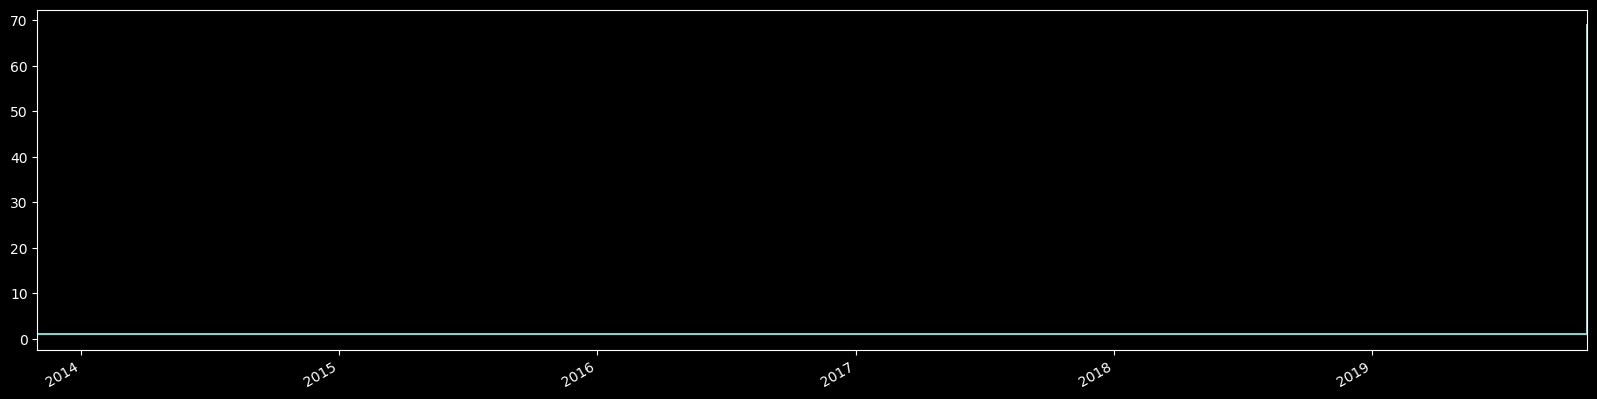

In [191]:
posts['posted_datetime'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

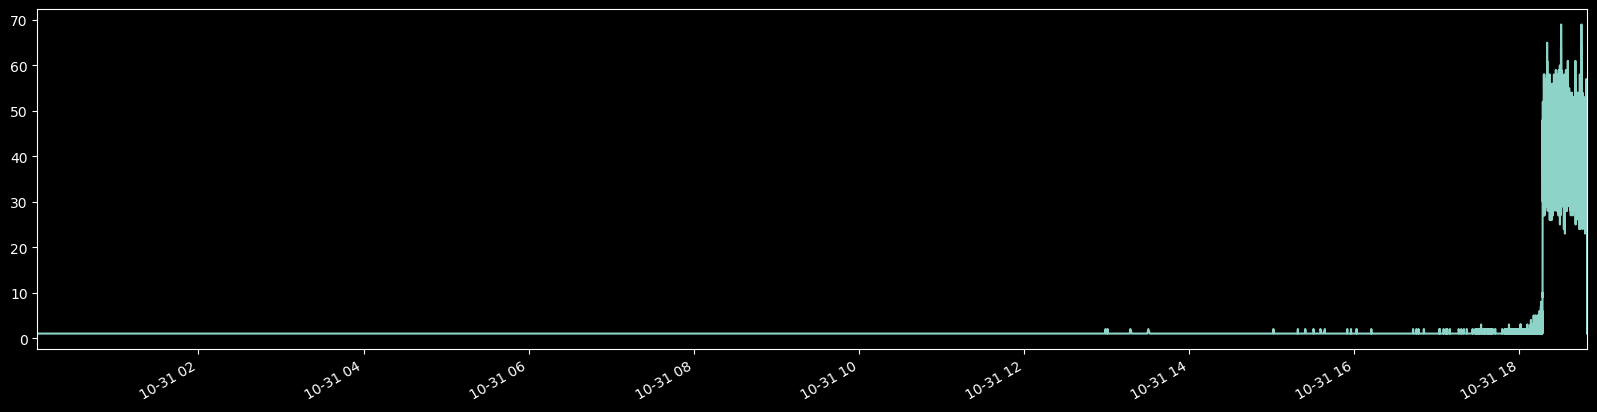

In [192]:
posts = posts.loc[posts['posted_datetime'] >= '2019-10-31 00:00:00'].copy()

posts['posted_datetime'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

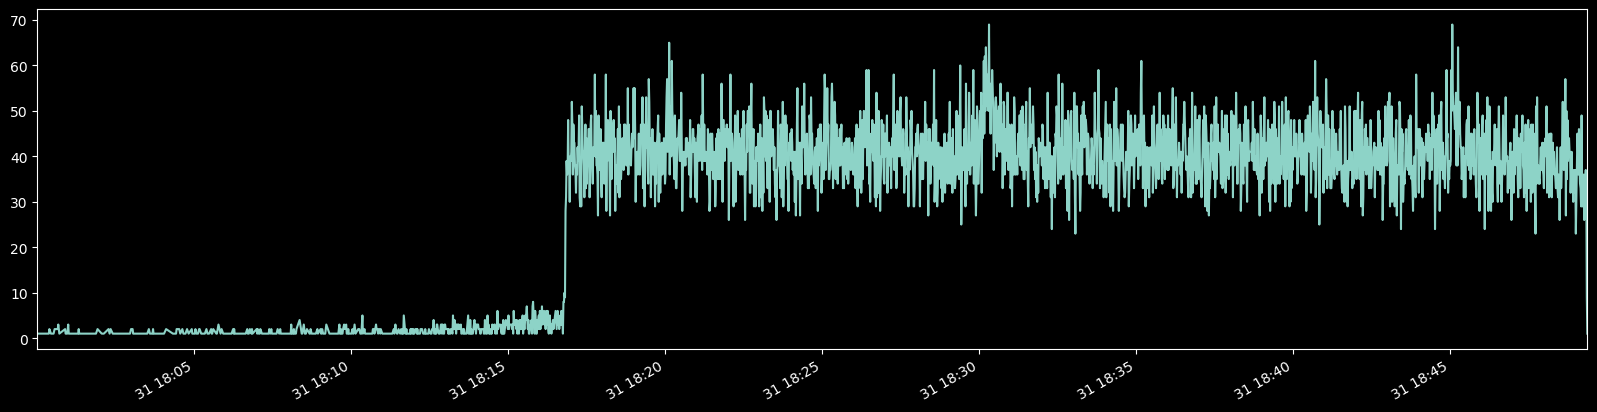

In [193]:
posts = posts.loc[posts['posted_datetime'] >= '2019-10-31 18:00:00'].copy()

posts['posted_datetime'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='line', figsize=(20,5))

In [194]:
posts = posts.loc[posts['posted_datetime'] >= '2019-10-31 18:20:00'].copy()
posts = posts.loc[posts['posted_datetime'] < '2019-10-31 18:45:00'].copy()

posts['posted_datetime_minute'] = posts['posted_datetime'].dt.floor('min')

In [195]:
posts.shape

(61548, 53)

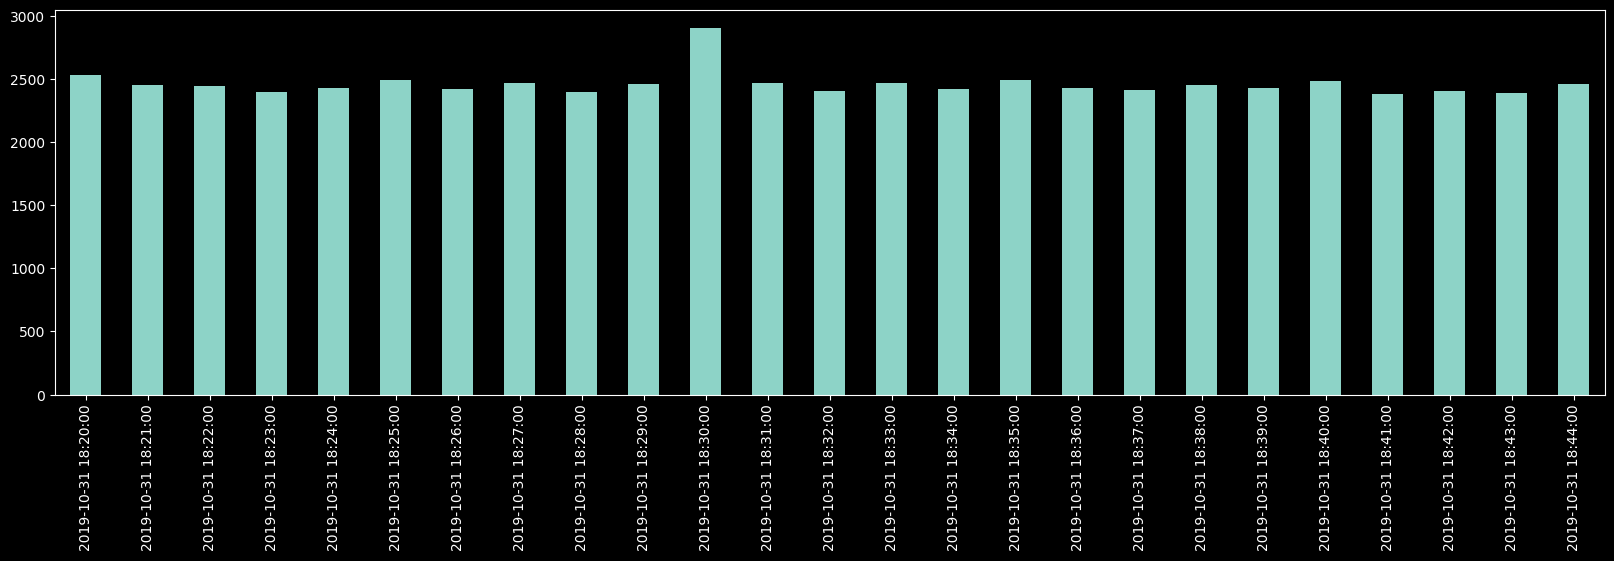

In [196]:
posts['posted_datetime_minute'] \
    .value_counts() \
    .sort_index(ascending=True) \
    .plot(kind='bar', figsize=(20,5))

In [198]:
posts.sort_values(
    by=['data.hashtag.edge_hashtag_to_media.edges.node.edge_liked_by.count'],
    ascending=False,
)[0:100].to_csv('top_posts.csv', header=True)

In [199]:
CAPTION_COLUMN_NAME = 'data.hashtag.edge_hashtag_to_media.edges.node.edge_media_to_caption.edges[0].node.text'
LIKE_COUNT_COLUMN_NAME = 'data.hashtag.edge_hashtag_to_media.edges.node.edge_liked_by.count'

hashtag_likes = {}

caption_posts = posts.dropna(subset=[CAPTION_COLUMN_NAME])

for i in caption_posts.index:
    post = caption_posts.loc[i]
    caption = post[CAPTION_COLUMN_NAME]
    like_count = post[LIKE_COUNT_COLUMN_NAME]
    
    hashtags = re.findall(r"#([a-zA-Z0-9]+)", caption)
    for hashtag in hashtags:
        hashtag = hashtag.lower()

        if hashtag not in hashtag_likes:
            hashtag_likes[hashtag] = 0
        hashtag_likes[hashtag] += like_count

In [200]:
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    colormap='autumn',
    background_color = 'black',
    stopwords = STOPWORDS).generate_from_frequencies(hashtag_likes)

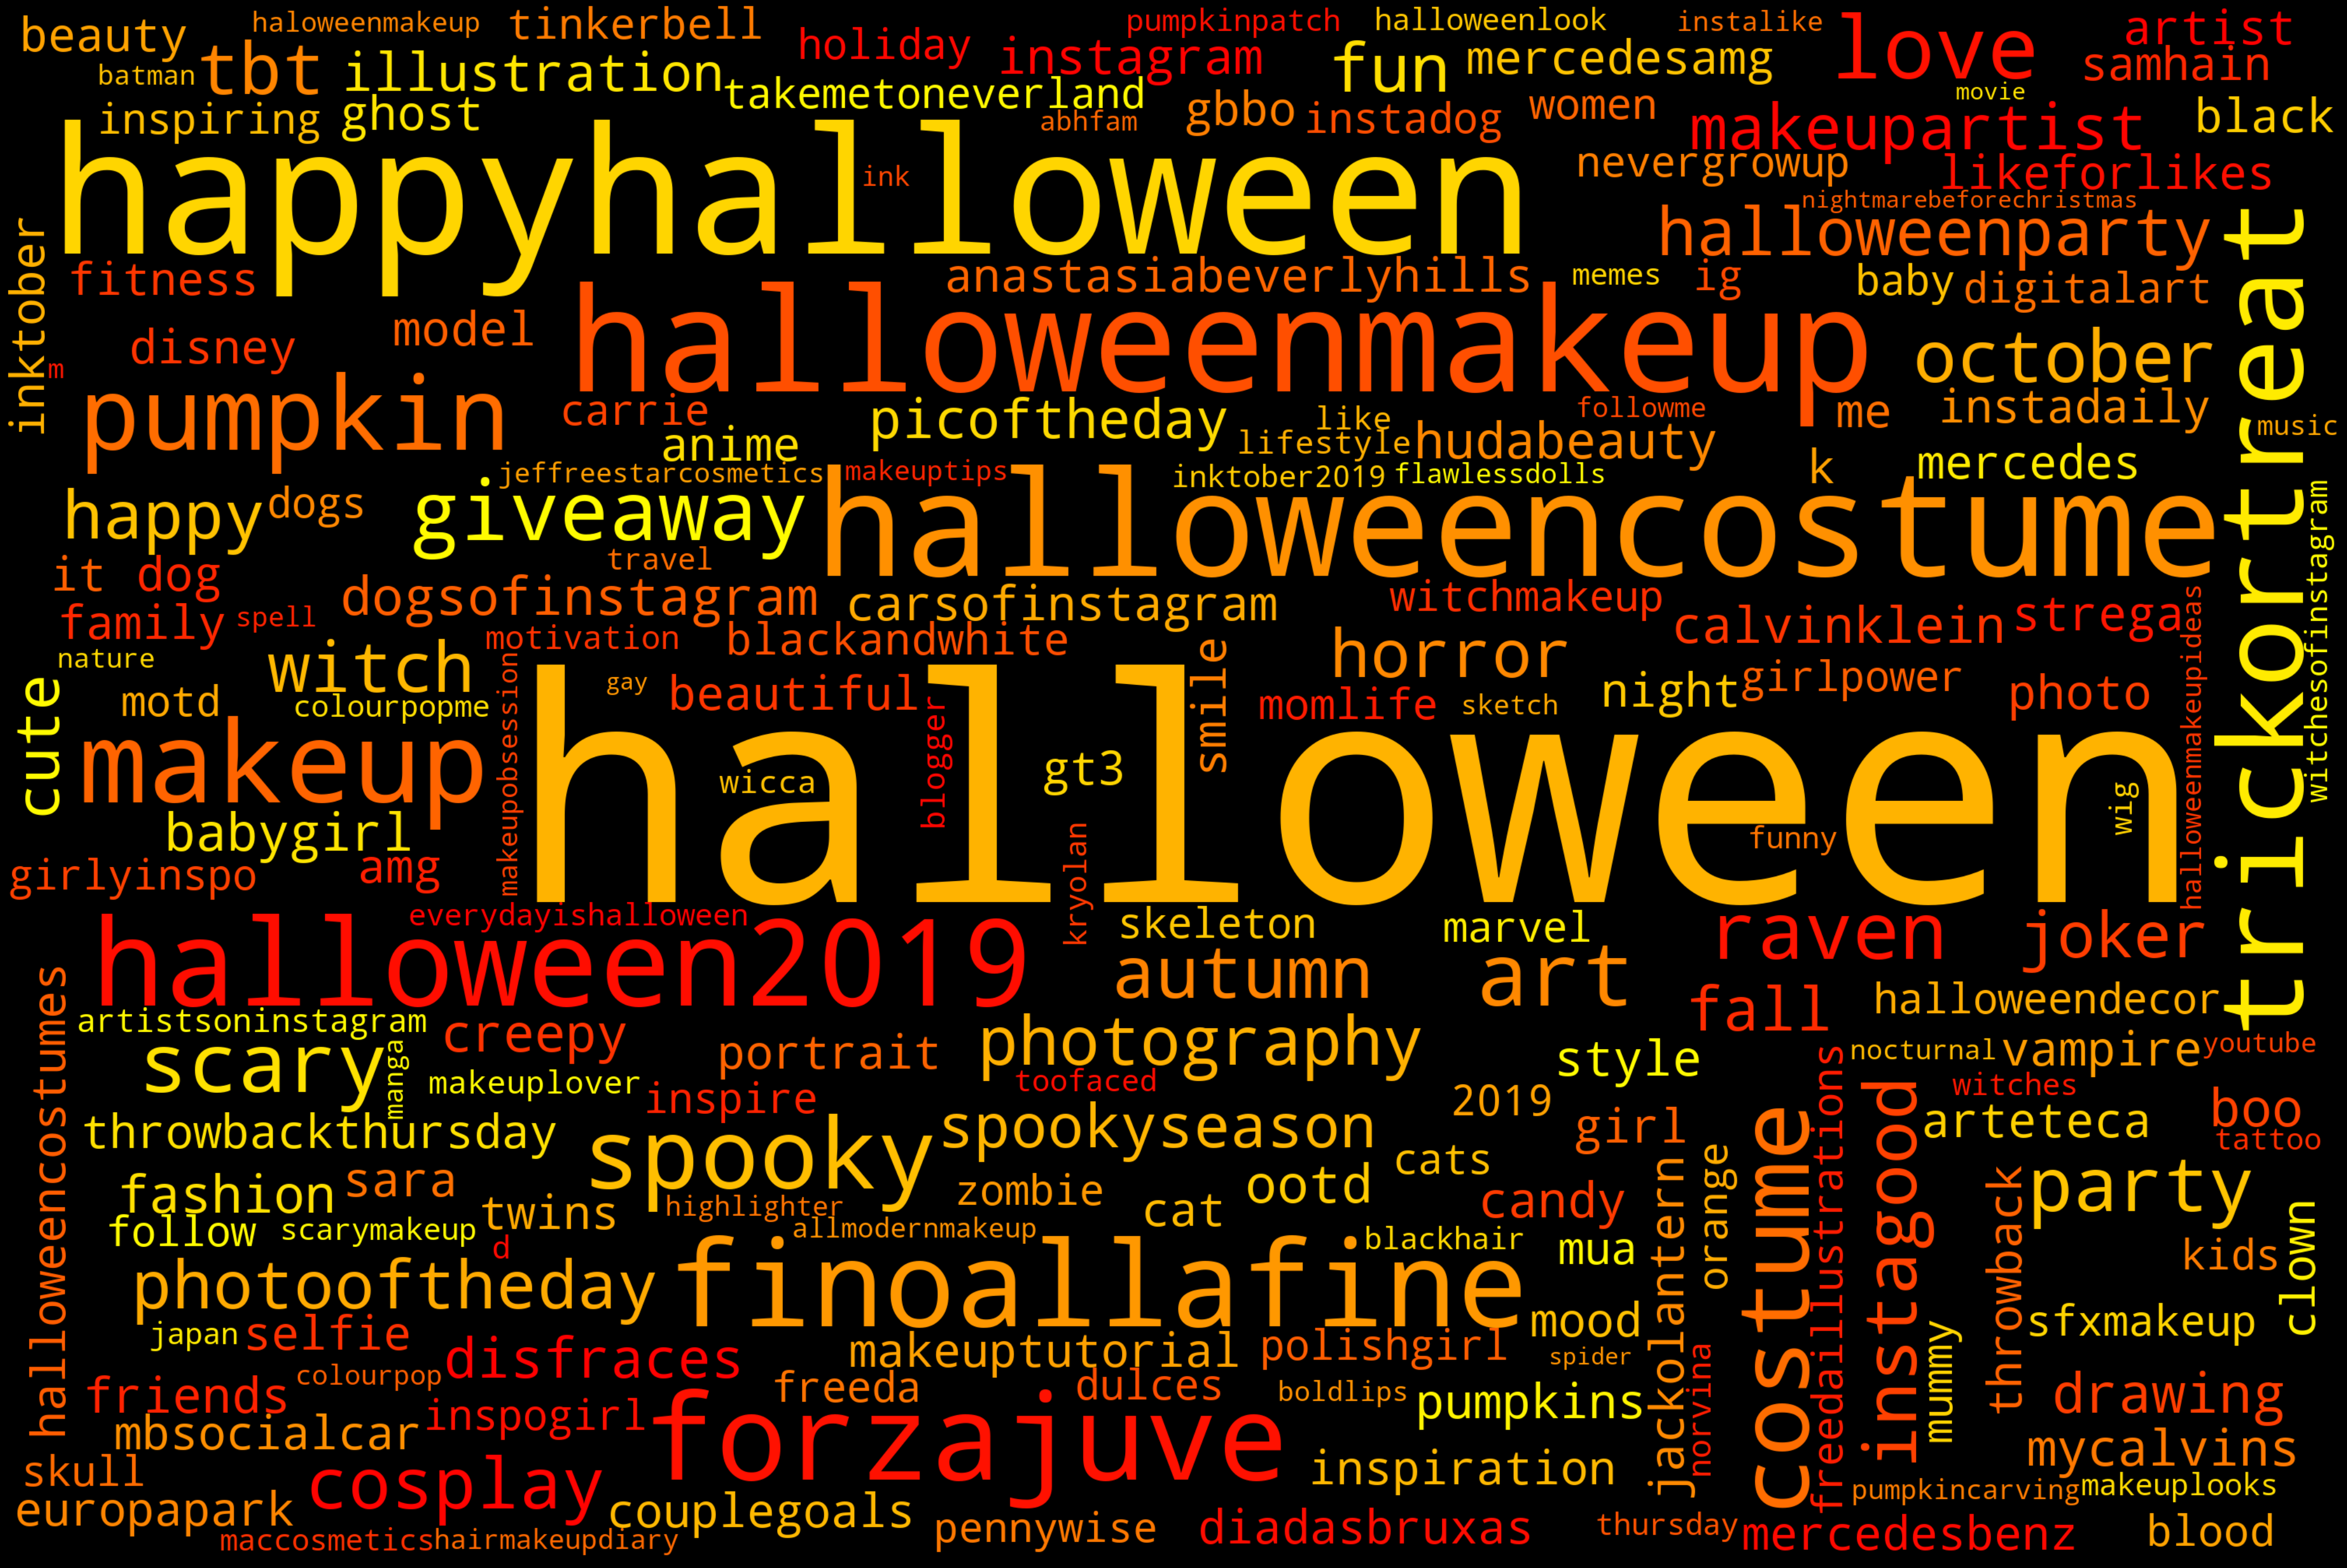

In [203]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()